# Car Sales Data

The goal of this exercise is the clean-up and exploration of a dataset of used cars retrieved from eBay.de

## Data read-in and initial visualisation

In [4]:
import numpy as np
import pandas as pd
autos = pd.read_csv("datasets/autos.csv",encoding="Latin-1")

In [5]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [6]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

The dataset is mostly made of object datatypes, with a few int64 datatypes. Columns vehicleType, gearbox, model, fuelType and notRepairedDamage contain some null data.

## Column renaming

In [7]:
colNames = autos.columns

In [8]:
colNames

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

The column names of this dataset are written in camelCase. Since snake_case is generally held to be more readable, columns should be renamed accordingly.

In [9]:
colNames = colNames.str.replace("yearOfRegistration","registration_year")
colNames = colNames.str.replace("monthOfRegistration","registration_month")
colNames = colNames.str.replace("notRepairedDamage","unrepaired_damage")
colNames = colNames.str.replace("dateCreated","ad_created")
colNames = colNames.str.lower()

In [10]:
colNames

Index(['datecrawled', 'name', 'seller', 'offertype', 'price', 'abtest',
       'vehicletype', 'registration_year', 'gearbox', 'powerps', 'model',
       'odometer', 'registration_month', 'fueltype', 'brand',
       'unrepaired_damage', 'ad_created', 'nrofpictures', 'postalcode',
       'lastseen'],
      dtype='object')

In [11]:
autos.columns = colNames

In [12]:
autos.head()

,datecrawled,name,seller,offertype,price,abtest,vehicletype,registration_year,gearbox,powerps,model,odometer,registration_month,fueltype,brand,unrepaired_damage,ad_created,nrofpictures,postalcode,lastseen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


## Feature engineering

Now that long and/or ambiguous column names were shortened and clarified and that all column names were brought to snake_case for readibility, column values should be explored to identify columns that should be engineered, amended or even dropped altogether.

In [13]:
autos.describe(include='all')

,datecrawled,name,seller,offertype,price,abtest,vehicletype,registration_year,gearbox,powerps,model,odometer,registration_month,fueltype,brand,unrepaired_damage,ad_created,nrofpictures,postalcode,lastseen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-04-04 16:40:33,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


No columns appear to be candidates to be dropped, although abtest seems worth investigating. price and odometer are numeric values stored as text, similarly datecrawled, ad_created and lastseen are datetime values stored as text. The registration_year column seems to contain anomalous values.

In [14]:
autos["abtest"].value_counts()

test       25756
control    24244
Name: abtest, dtype: int64

The abtest column appears to contain data which is irrelevant to further analysis and may be dropped.

### Numeric columns
#### String to numeric conversion

In [15]:
autos["price"].value_counts()

$0            1421
$500           781
$1,500         734
$2,500         643
$1,200         639
$1,000         639
$600           531
$3,500         498
$800           498
$2,000         460
$999           434
$750           433
$900           420
$650           419
$850           410
$700           395
$4,500         394
$300           384
$2,200         382
$950           379
$1,100         376
$1,300         371
$3,000         365
$550           356
$1,800         355
$5,500         340
$1,250         335
$350           335
$1,600         327
$1,999         322
              ... 
$14,863          1
$13,911          1
$277             1
$255             1
$4,860           1
$1,300,000       1
$3,266           1
$12,860          1
$22,499          1
$3,620           1
$1,981           1
$1,960           1
$22,200          1
$12,480          1
$11,899          1
$47,800          1
$30,200          1
$3,425           1
$4,335           1
$501             1
$20,290          1
$2,695      

The price column seems to be formatted uniformly.

In [16]:
autos["odometer"].value_counts()

150,000km    32424
125,000km     5170
100,000km     2169
90,000km      1757
80,000km      1436
70,000km      1230
60,000km      1164
50,000km      1027
5,000km        967
40,000km       819
30,000km       789
20,000km       784
10,000km       264
Name: odometer, dtype: int64

The odometer column is formatted uniformly.

Both price and odometer columns are essentially numeric columns. Once the $ and km symbols are removed the values can be simply recast as integers. Since the reference to dollars and kilometers are deleted from the values the columns must also be renamed so that information is not lost.

In [17]:
autos["price"] = autos["price"].str.replace(",","").str.replace("$","").astype(int)
autos.rename({"price":"price_dollars"},axis=1,inplace=True)
autos["odometer"]=autos["odometer"].str.replace(",","").str.replace("km","").astype(int)
autos.rename({"odometer":"odometer_km"},axis=1,inplace=True)

#### Null and suspicious values

The autos column seems to contain some suspicious zero values.

In [18]:
autos["price_dollars"].value_counts().sort_index(ascending=False)

99999999       1
27322222       1
12345678       3
11111111       2
10000000       1
3890000        1
1300000        1
1234566        1
999999         2
999990         1
350000         1
345000         1
299000         1
295000         1
265000         1
259000         1
250000         1
220000         1
198000         1
197000         1
194000         1
190000         1
180000         1
175000         1
169999         1
169000         1
163991         1
163500         1
155000         1
151990         1
            ... 
66             1
65             5
60             9
59             1
55             2
50            49
49             4
47             1
45             4
40             6
35             1
30             7
29             1
25             5
20             4
18             1
17             3
15             2
14             1
13             2
12             3
11             2
10             7
9              1
8              1
5              2
3              1
2             

In [19]:
# Focus on the smallest prices in the dataset
autos["price_dollars"].value_counts().sort_index(ascending=False).tail(200)

760       8
755       1
750     433
749      23
745       2
744       1
740       3
730       5
729       1
725       2
720       7
719       1
710       1
700     395
699     127
695       3
690      68
689       2
686       1
680      30
679       1
675       5
670       6
669       2
666      14
660       5
655       1
650     419
649      14
648       1
       ... 
66        1
65        5
60        9
59        1
55        2
50       49
49        4
47        1
45        4
40        6
35        1
30        7
29        1
25        5
20        4
18        1
17        3
15        2
14        1
13        2
12        3
11        2
10        7
9         1
8         1
5         2
3         1
2         3
1       156
0      1421
Name: price_dollars, Length: 200, dtype: int64

In [20]:
# Focus on the top prices in the dataset
autos.sort_values("price_dollars",ascending=False).head(10)

,datecrawled,name,seller,offertype,price_dollars,abtest,vehicletype,registration_year,gearbox,powerps,model,odometer_km,registration_month,fueltype,brand,unrepaired_damage,ad_created,nrofpictures,postalcode,lastseen
39705,2016-03-22 14:58:27,Tausch_gegen_gleichwertiges,privat,Angebot,99999999,control,limousine,1999,automatik,224,s_klasse,150000,9,benzin,mercedes_benz,NaN,2016-03-22 00:00:00,0,73525,2016-04-06 05:15:30
42221,2016-03-08 20:39:05,Leasinguebernahme,privat,Angebot,27322222,control,limousine,2014,manuell,163,c4,40000,2,diesel,citroen,NaN,2016-03-08 00:00:00,0,76532,2016-03-08 20:39:05
27371,2016-03-09 15:45:47,Fiat_Punto,privat,Angebot,12345678,control,NaN,2017,NaN,95,punto,150000,0,NaN,fiat,NaN,2016-03-09 00:00:00,0,96110,2016-03-09 15:45:47
39377,2016-03-08 23:53:51,Tausche_volvo_v40_gegen_van,privat,Angebot,12345678,control,NaN,2018,manuell,95,v40,150000,6,NaN,volvo,nein,2016-03-08 00:00:00,0,14542,2016-04-06 23:17:31
47598,2016-03-31 18:56:54,Opel_Vectra_B_1_6i_16V_Facelift_Tuning_Showcar...,privat,Angebot,12345678,control,limousine,2001,manuell,101,vectra,150000,3,benzin,opel,nein,2016-03-31 00:00:00,0,4356,2016-03-31 18:56:54
2897,2016-03-12 21:50:57,Escort_MK_1_Hundeknochen_zum_umbauen_auf_RS_2000,privat,Angebot,11111111,test,limousine,1973,manuell,48,escort,50000,3,benzin,ford,nein,2016-03-12 00:00:00,0,94469,2016-03-12 22:45:27
24384,2016-03-21 13:57:51,Schlachte_Golf_3_gt_tdi,privat,Angebot,11111111,test,NaN,1995,NaN,0,NaN,150000,0,NaN,volkswagen,NaN,2016-03-21 00:00:00,0,18519,2016-03-21 14:40:18
11137,2016-03-29 23:52:57,suche_maserati_3200_gt_Zustand_unwichtig_laufe...,privat,Angebot,10000000,control,coupe,1960,manuell,368,NaN,100000,1,benzin,sonstige_autos,nein,2016-03-29 00:00:00,0,73033,2016-04-06 21:18:11
47634,2016-04-04 21:25:21,Ferrari_FXX,privat,Angebot,3890000,test,coupe,2006,NaN,799,NaN,5000,7,NaN,sonstige_autos,nein,2016-04-04 00:00:00,0,60313,2016-04-05 12:07:37
7814,2016-04-04 11:53:31,Ferrari_F40,privat,Angebot,1300000,control,coupe,1992,NaN,0,NaN,50000,12,NaN,sonstige_autos,nein,2016-04-04 00:00:00,0,60598,2016-04-05 11:34:11


Some of the top price values appear to be errors, while the Ferrari FXX and Ferrari F40 values seem to be reasonable listings. A choice was made here is to cut the listings at 4 million dollars. A great number of the lowest prices are also quite suspicious, but the problem is that there is no way to tell which are genuine errors and which are simply underpriced - 1, 3, 5, 10 are all likely errors, but were does this stop? Only removing prices equal to zero seems the most conservative approach here.

In [21]:
autos = autos[autos["price_dollars"].between(1,4000000)]

In [22]:
autos["price_dollars"].describe()

count    4.857100e+04
mean     6.082245e+03
std      2.278698e+04
min      1.000000e+00
25%      1.200000e+03
50%      3.000000e+03
75%      7.490000e+03
max      3.890000e+06
Name: price_dollars, dtype: float64

In [23]:
autos["price_dollars"].value_counts().sort_index(ascending=False)

3890000      1
1300000      1
1234566      1
999999       2
999990       1
350000       1
345000       1
299000       1
295000       1
265000       1
259000       1
250000       1
220000       1
198000       1
197000       1
194000       1
190000       1
180000       1
175000       1
169999       1
169000       1
163991       1
163500       1
155000       1
151990       1
145000       1
139997       1
137999       1
135000       1
130000       1
          ... 
70          10
66           1
65           5
60           9
59           1
55           2
50          49
49           4
47           1
45           4
40           6
35           1
30           7
29           1
25           5
20           4
18           1
17           3
15           2
14           1
13           2
12           3
11           2
10           7
9            1
8            1
5            2
3            1
2            3
1          156
Name: price_dollars, Length: 2351, dtype: int64

What about the odometer values?

In [27]:
autos["odometer_km"].describe()

count     48571.000000
mean     125767.536184
std       39791.893858
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

To summarise, suspicious high prices were removed. Many low prices are likely to be errors but there is no way to decide which is which, so only prices equal to zero were removed. The odometer values seem all fine.

Numeric columns were taken care of. Date columns are up next. 

### Datetime columns

In [24]:
autos['datecrawled'].str[:10].value_counts(dropna=False).sort_index()

2016-03-05    1230
2016-03-06     682
2016-03-07    1749
2016-03-08    1617
2016-03-09    1607
2016-03-10    1563
2016-03-11    1582
2016-03-12    1793
2016-03-13     761
2016-03-14    1775
2016-03-15    1665
2016-03-16    1438
2016-03-17    1537
2016-03-18     627
2016-03-19    1689
2016-03-20    1840
2016-03-21    1816
2016-03-22    1603
2016-03-23    1565
2016-03-24    1425
2016-03-25    1535
2016-03-26    1564
2016-03-27    1510
2016-03-28    1693
2016-03-29    1657
2016-03-30    1636
2016-03-31    1546
2016-04-01    1636
2016-04-02    1723
2016-04-03    1875
2016-04-04    1774
2016-04-05     636
2016-04-06     154
2016-04-07      68
Name: datecrawled, dtype: int64

The dataset seems to cover entries crawled between March and April 2016.

In [25]:
autos["registration_year"].value_counts()

2000    3156
2005    2936
1999    2898
2004    2703
2003    2699
2006    2671
2001    2636
2002    2486
1998    2363
2007    2277
2008    2215
2009    2086
1997    1951
2011    1623
2010    1589
2017    1392
1996    1373
2012    1310
1995    1227
2016    1220
2013     803
2014     663
1994     629
2018     470
1993     425
2015     392
1992     371
1990     347
1991     339
1989     174
        ... 
1950       3
9999       3
1800       2
1951       2
1941       2
1934       2
1954       2
1957       2
1955       2
2019       2
1001       1
1939       1
4500       1
1953       1
1111       1
4800       1
5911       1
1943       1
1938       1
1929       1
2800       1
6200       1
4100       1
8888       1
1927       1
9000       1
1948       1
1000       1
1931       1
1952       1
Name: registration_year, Length: 95, dtype: int64

The registration_year column contains a number of values which make little sense such as values above 2016 or below 1900. 1900 seems to be a good compromise, registration years before 1900 are extremely likely to be errors, while registration years 1900-1930 may contain some errors but are otherwise realistic and would require manual confirmation of each.

In [26]:
autos = autos[autos["registration_year"].between(1900,2016)]

In [27]:
autos["registration_year"].describe()

count    46687.000000
mean      2002.909782
std          7.186105
min       1910.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       2016.000000
Name: registration_year, dtype: float64

In [28]:
autos["registration_year"].value_counts(normalize=True)

2000    0.067599
2005    0.062887
1999    0.062073
2004    0.057896
2003    0.057811
2006    0.057211
2001    0.056461
2002    0.053248
1998    0.050614
2007    0.048772
2008    0.047444
2009    0.044681
1997    0.041789
2011    0.034763
2010    0.034035
1996    0.029409
2012    0.028059
1995    0.026281
2016    0.026131
2013    0.017200
2014    0.014201
1994    0.013473
1993    0.009103
2015    0.008396
1992    0.007947
1990    0.007432
1991    0.007261
1989    0.003727
1988    0.002892
1985    0.002056
          ...   
1966    0.000471
1976    0.000450
1969    0.000407
1975    0.000386
1965    0.000364
1964    0.000257
1963    0.000171
1959    0.000129
1961    0.000129
1910    0.000107
1956    0.000086
1958    0.000086
1937    0.000086
1962    0.000086
1950    0.000064
1954    0.000043
1941    0.000043
1951    0.000043
1934    0.000043
1957    0.000043
1955    0.000043
1953    0.000021
1943    0.000021
1929    0.000021
1939    0.000021
1938    0.000021
1948    0.000021
1927    0.0000

The minimum registration_year is now 1910 and the maximum is correctly 2016.

### Categorical columns
The dataset contains a "brand" column. This will be useful to analyse the data by car make.

In [33]:
autos["brand"].unique().shape

(40,)

In [34]:
autos["brand"].value_counts()

volkswagen        9864
bmw               5138
opel              5022
mercedes_benz     4503
audi              4041
ford              3264
renault           2201
peugeot           1393
fiat              1197
seat               853
skoda              766
nissan             713
mazda              709
smart              661
citroen            654
toyota             593
hyundai            468
sonstige_autos     460
volvo              427
mini               409
mitsubishi         384
honda              366
kia                330
alfa_romeo         310
porsche            286
suzuki             277
chevrolet          266
chrysler           164
dacia              123
daihatsu           117
jeep               106
subaru             100
land_rover          98
saab                77
jaguar              73
daewoo              70
trabant             65
rover               62
lancia              50
lada                27
Name: brand, dtype: int64

The column contains a number of "sonstige_autos" values. This simply means "other cars" in German.

In [29]:
autos["brand"] = autos["brand"].str.replace("sonstige_autos","other")

In [30]:
# Retrieve the brand names as a list
brand_names = autos["brand"].value_counts().index

## Data analysis
Now that the dataset is cleaned, the next step is data analysis. Some simple tasks will be carried out for this exercise, such as exploring mean car prices and mean mileage by brand.

#### Mean price by brand

In [34]:
mean_price_by_brand = {}
for b in brand_names:
    brand_slice = autos.loc[autos["brand"]==b,"price_dollars"]
    mean_price_by_brand[b] = brand_slice.mean()
mpbbMin = min(mean_price_by_brand,key=mean_price_by_brand.get)
mpbbMax = max(mean_price_by_brand,key=mean_price_by_brand.get)
print("Lowest mean price by brand: ", mpbbMin, "\nHighest mean price by brand: ", mpbbMax)

Lowest mean price by brand:  daewoo 
Highest mean price by brand:  porsche


Of all the car manufacturers, Daewoo produces the cars with the lowest mean price, while Porsche produces those with the highest mean price.

#### Mean mileage by brand

In [35]:
mean_mileage_by_brand = {}
for b in brand_names:
    brand_slice = autos.loc[autos["brand"]==b,"odometer_km"]
    mean_mileage_by_brand[b] = brand_slice.mean()
mmbbMin = min(mean_mileage_by_brand,key=mean_mileage_by_brand.get)
mmbbMax = max(mean_mileage_by_brand,key=mean_mileage_by_brand.get)
print("Lowest mean mileage by brand: ", mmbbMin, "\nHighest mean mileage by brand: ", mmbbMax)

Lowest mean mileage by brand:  trabant 
Highest mean mileage by brand:  saab


Of all the car manufacturers, Trabant produces the cars with the lowest mean mileage, while Saab produces those with the highest mean mileage.

#### Mean price vs. Mean mileage
Is there a relationship between mean price and mean mileage?

In [36]:
mean_price_series = pd.Series(mean_price_by_brand)
mean_mileage_series = pd.Series(mean_mileage_by_brand)
price_mileage_df = pd.DataFrame(mean_price_series, columns=["mean_price"])
price_mileage_df["mean_mileage"] = mean_mileage_series
price_mileage_df

,mean_price,mean_mileage
volkswagen,5604.071269,128711.476075
bmw,8571.480148,132575.905021
opel,2975.241935,129310.035842
mercedes_benz,8628.450366,130788.363313
audi,9336.687454,129157.386785
ford,4054.693015,124266.237745
renault,2474.864607,128071.331213
peugeot,3094.017229,127153.625269
fiat,2813.748538,117121.971596
seat,4397.230950,121131.301290


Text(0.5,1,'Mean price vs. Mean mileage')

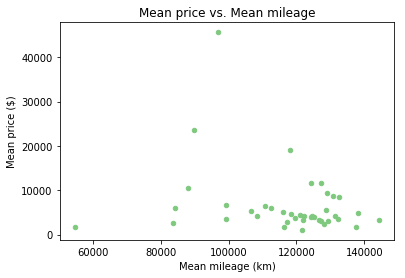

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
price_mileage_df.plot.scatter(x="mean_mileage",y="mean_price",ax=ax,color=plt.cm.Accent(0))
ax.set_xlabel("Mean mileage (km)")
ax.set_ylabel("Mean price ($)")
ax.set_title("Mean price vs. Mean mileage")

In [39]:
price_mileage_ordered = price_mileage_df.sort_values("mean_price",ascending=False)
price_mileage_ordered

,mean_price,mean_mileage
porsche,45643.937063,96853.146853
other,23567.513043,89684.782609
land_rover,19108.091837,118010.204082
jeep,11650.500000,127122.641509
jaguar,11635.493151,124178.082192
mini,10613.459658,88105.134474
audi,9336.687454,129157.386785
mercedes_benz,8628.450366,130788.363313
bmw,8571.480148,132575.905021
chevrolet,6684.139098,99191.729323


No clear pattern emerges from the data as the top priced brands seem to have somewhat lower mileage but the lowest mileage belongs to Trabant cars, which have average price $1791.